In [1]:
# Notebook imports and packages
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# 3D Plot MSE cost function (and understanding what's happening here):
$$MSE=\frac{1}{n}\sum^n_{i=1}\left( y-\hat{y}\right)^2$$

## Data and regression

First we start with some data points $X$ and $Y$:

In [2]:
x = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).T
y = np.array([[1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]]).T

Our aim here is, probably, to understand the relationship in that data. Something like: "what if we get a new data $x=0.5$, what will $y$ be (considering $X$ and $Y$ are associated)?"

One of the simplest analysis we can do for that is to linear regress $X$ on $Y$:

In [3]:
regr = LinearRegression()
regr.fit(x, y)

print(
    f"th_0: {regr.intercept_[0]}",
    f"th_1: {regr.coef_[0, 0]}",
    sep='\n\n'
)

th_0: 0.8475351486029545

th_1: 1.2227264637835913


After doing the regression we can easily input any new $x$ and calculate what would $y$ be with these parameters. Here, for $x=0.5$ we have $y=1.459$.

In [4]:
y_pred = regr.intercept_[0] + regr.coef_[0, 0] * 0.5

print(f"y = f(0.5) = th_0 + th_1 * 0.5 = {y_pred}")

y = f(0.5) = th_0 + th_1 * 0.5 = 1.4588983804947502


We can also input our $X$ vector. In this case, $\hat{y}$ ends up being a vector too. "`y_hat`" has the calculated $\hat{y}$ (our prediction) for each $x$ (in this case the $x$ data points we have) using this specific intercept ($\theta_0$) and coefficient ($\theta_1$).

In [5]:
y_hat = regr.intercept_[0] + regr.coef_[0, 0] * x 
print(f"y_hat:\n{y_hat}")

y_hat:
[[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]


## MSE function and thetas

 But now we can also ask ourselves: "how good is this inference/prediction though?". That's where cost functions like MSE come in.

Initially, we wanted to know what would $y$ (or rather, $\hat{y}$) be given some new $x$. Now we want to evaluate how good is our model, so we can't use "new X positions". We have to use the $X$ and $Y$ data points we already have. With them we can evaluate "if we input each of those $x$, how far would we be from the actual $y$". In other words, our $x$ and $y$ won't vary: they're "pre-defined". What's gonna change/vary are the "$a$" and "$b$" in "$y=b+a\cdot x$": for each $a$ and $b$ we will have a different calculated cost.

Here is where things start to become a little bit clearer, before they become dim again (for those reading this because the instructor didn't explain things in the lesson as thouroughly as some may wish):

- We have two variables "$a$" and "$b$", in addition to a cost **function of those two variables**:



With **two variables** and a **function of those two variables**, if we want to visualize them, we fall into the necessity of 3D plotting.

This plotting is exactly as in the earlier lessons (found in my other notebooks) where was plotted "$(x, y, f(x,y))$". The difference is that here we're calling $x$ by "th_0" ($\theta_0$), calling $y$ by "th_1" ($\theta_1$) and our function "$f(x,y)$" is the "`mse(theta_0, theta_1)`" ($MSE(\theta_0,\theta_1)$) function.

In [6]:
def mse(y, y_hat):
    return np.average(np.power(y-y_hat,2), axis=0)
# Remember "y_hat = b + a * x", so "a" and "b" are inlaid in here.

---

Just to make it clearer, the function above could easily be written as:
```
def mse(theta_0, theta_1):
    y_hat = theta_0 + theta_1 * x
    return np.average(np.power(y - y_hat, 2), axis=0)
```
Both the vectors $Y$ and $X$ never change. So they can be defined in the global scope first and then read from within the function (though this might not be good practice... i think?). What change are $\theta_0$ and $\theta_1$, so we pass them into the function to calculate the new MSE based on them.

Basically, our $MSE(\theta_0,\theta_1)$ function is depended on both thetas the same way as the earlier $f(x,y)$ functions were dependent on $x$ and $y$. Making it possible to 3D plot.

---

## More on thetas and "data-points"

So far we actually just calculated one $(\theta_0,\theta_1, MSE(\theta_0,\theta_1))$ when we did that regression earlier. If we want to visualize the 3D shape of our cost function (which is the aim of this lesson), we need to go through a lot of "$(\theta_0,\theta_1, MSE(\theta_0,\theta_1))$ data-points" (the little dots) to be able to draw a 3D surface. That's why the teacher just generates some thetas.

By the way, we don't really care which theta we have specifically yet. We aren't optimizing them yet: we just need some, any, thetas to plot the graph.

In [7]:
# Generating thetas
nr_thetas = 5
th_0 = th_1 = np.linspace(start=1, stop=5, num=nr_thetas)

print(
    f"th_0: {th_0}",
    f"th_1: {th_1}",
    sep='\n'
)

th_0: [1. 2. 3. 4. 5.]
th_1: [1. 2. 3. 4. 5.]


Now we have five $\theta_0$'s and five $\theta_1$'s: they go from 1 to 5. Finally, we can run them through our mse function to calculate the distance from each of the y_hat of their respective "true y".

As examples, we can take th_0[0] and th_1[0] to calculate with x[0] and get 

$$\hat{y} =  \theta_0[0] + \theta_1[0] \cdot x[0]$$
$$\hat{y} = 1 + 1 \cdot 0.1$$
$$\hat{y} = 1.1$$

Then we can compare it to the "true y[0]", which is 1.7.

In [8]:
y_hat = th_0[0]+th_1[0]*x[0]
print(
    y_hat,
    y[0],
    mse(y[0], y_hat),
    sep='\n'
)

[1.1]
[1.7]
0.3599999999999998


 A little note, the "MSE" above isn't actually the MSE we will find later, we'd need to input all the $x$'s and $y$'s as I'll do next:

In [9]:
y_hat = th_0[0]+th_1[0]*x

print(
    f"Thetas: {(th_0[0], th_1[0])}\n",
    f"x:\n{x}\n",
    f"y:\n{y}\n",
    f"y_hat:\n{y_hat}\n",
    f"MSE: {mse(y,y_hat)}",
    sep='\n'
)

Thetas: (1.0, 1.0)

x:
[[0.1]
 [1.2]
 [2.4]
 [3.2]
 [4.1]
 [5.7]
 [6.5]]

y:
[[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]

y_hat:
[[1.1]
 [2.2]
 [3.4]
 [4.2]
 [5.1]
 [6.7]
 [7.5]]

MSE: [1.51857143]


We can do that to any (and every) combination of th_0 and th_1. For every combination we have to caculate the mean squared error comparing the predicted $\hat{y}$ with the true $y$ data.

After calculating the **MSE** with many (**th_0**,**th_1**) pairs we will have all the dots to draw a 3D surface. Done! Wait no, we're not done yet... This is what was the most confusing for me, I had to do some searching and testing/visualizing to get what's going on here:

## First, plot the thetas:

[1. 2. 3. 4. 5.] 

[1. 2. 3. 4. 5.] 



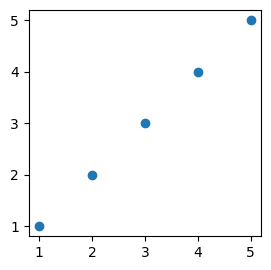

In [10]:
print(th_0,'\n')
print(th_1, '\n')

plt.figure(figsize=[3, 3], dpi=100)
plt.scatter(th_0, th_1)
plt.show()

This will be the base/bottom plane $(x, y)$, or rather $(\theta_0, \theta_1)$, for our 3D plot. But think about it: we don't want to draw the data-points (with its MSE on the 3D plot) of just the "theta pairs" (1, 1), (2, 2), (3, 3), (4, 4) and (5, 5). That would end up drawing just a "line" in the 3D plot (probably? that's considering the function even accept this data as it is, which it probably doesn't. idk for sure). In my mind, when i thought of th_0 and th_1 as they were I already assumed "matching them completely", but python doesn't read our minds and we gotta tell it exactly what we want.

When we said we calculate every theta pair, we meant we should calculate for **every** matched theta pair in both vectors: (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3) and so on... So we gotta generate those pairs too. That's where meshgrid comes in to the rescue.

## Second, plot the meshgrid thetas

Meshgrid makes it easy to do what I just said:

[[1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]] 

[[1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4.]
 [5. 5. 5. 5. 5.]] 



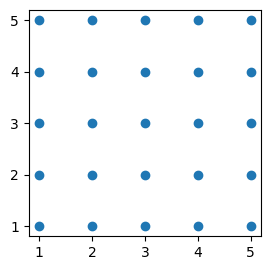

In [11]:
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

print(plot_t0,'\n')
print(plot_t1, '\n')

plt.figure(figsize=[3, 3], dpi=100)
plt.scatter(plot_t0, plot_t1)
plt.show()

Now our code knows what we wanted.

The code above works as if we plotted 5 scatter plots (one for each row of the matrix), but we plot them all directly.

First row:
x: [1. 2. 3. 4. 5.]
y: [1. 1. 1. 1. 1.]



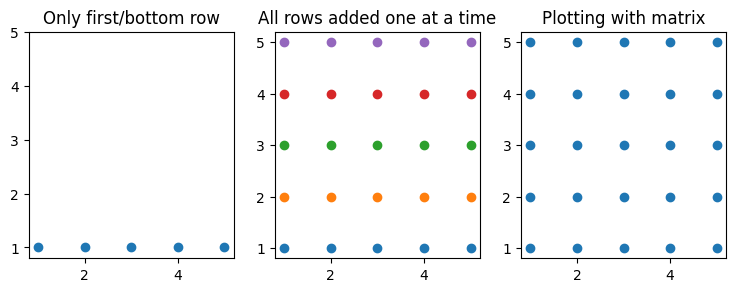

In [12]:
print(f"First row:\nx: {plot_t0[0,:]}\ny: {plot_t1[0,:]}\n")

fig= plt.figure(figsize=[9, 3], dpi=100)


# First plot
fig.add_subplot(1, 3, 1)

plt.title("Only first/bottom row")
plt.ylim((.8,5))
plt.scatter(plot_t0[0,:], plot_t1[0,:])


# Second plot
fig.add_subplot(1, 3, 2)

plt.title("All rows added one at a time")
plt.scatter(plot_t0[0,:], plot_t1[0,:])
plt.scatter(plot_t0[1,:], plot_t1[1,:])
plt.scatter(plot_t0[2,:], plot_t1[2,:])
plt.scatter(plot_t0[3,:], plot_t1[3,:])
plt.scatter(plot_t0[4,:], plot_t1[4,:])


# Third plot
fig.add_subplot(1, 3, 3)

plt.title("Plotting with matrix")
plt.scatter(plot_t0, plot_t1)


plt.show()

## Finally, the 3D surface

If we calculate the MSE of each of those theta pairs (the dots) we can, finally, draw our 3D surface:

In [13]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x
        plot_cost[i][j] = mse(y, y_hat)

print(plot_t0.shape, plot_t1.shape, plot_cost.shape, '\n')
print(plot_cost)

(5, 5) (5, 5) (5, 5) 

[[  1.51857143   1.34714286   3.17571429   7.00428571  12.83285714]
 [ 11.16428571  17.62142857  26.07857143  36.53571429  48.99285714]
 [ 51.95285714  65.03857143  80.12428571  97.21       116.29571429]
 [123.88428571 143.59857143 165.31285714 189.02714286 214.74142857]
 [226.95857143 253.30142857 281.64428571 311.98714286 344.33      ]]


Now we have 25 dots and 25 costs. Each dot is a (th_0, th_1) pair and their respective cost says how bad they predict "y" (the higher the MSE the worst the prediction).

Now input the dots and the cost into the 3D plotting code and here we are:

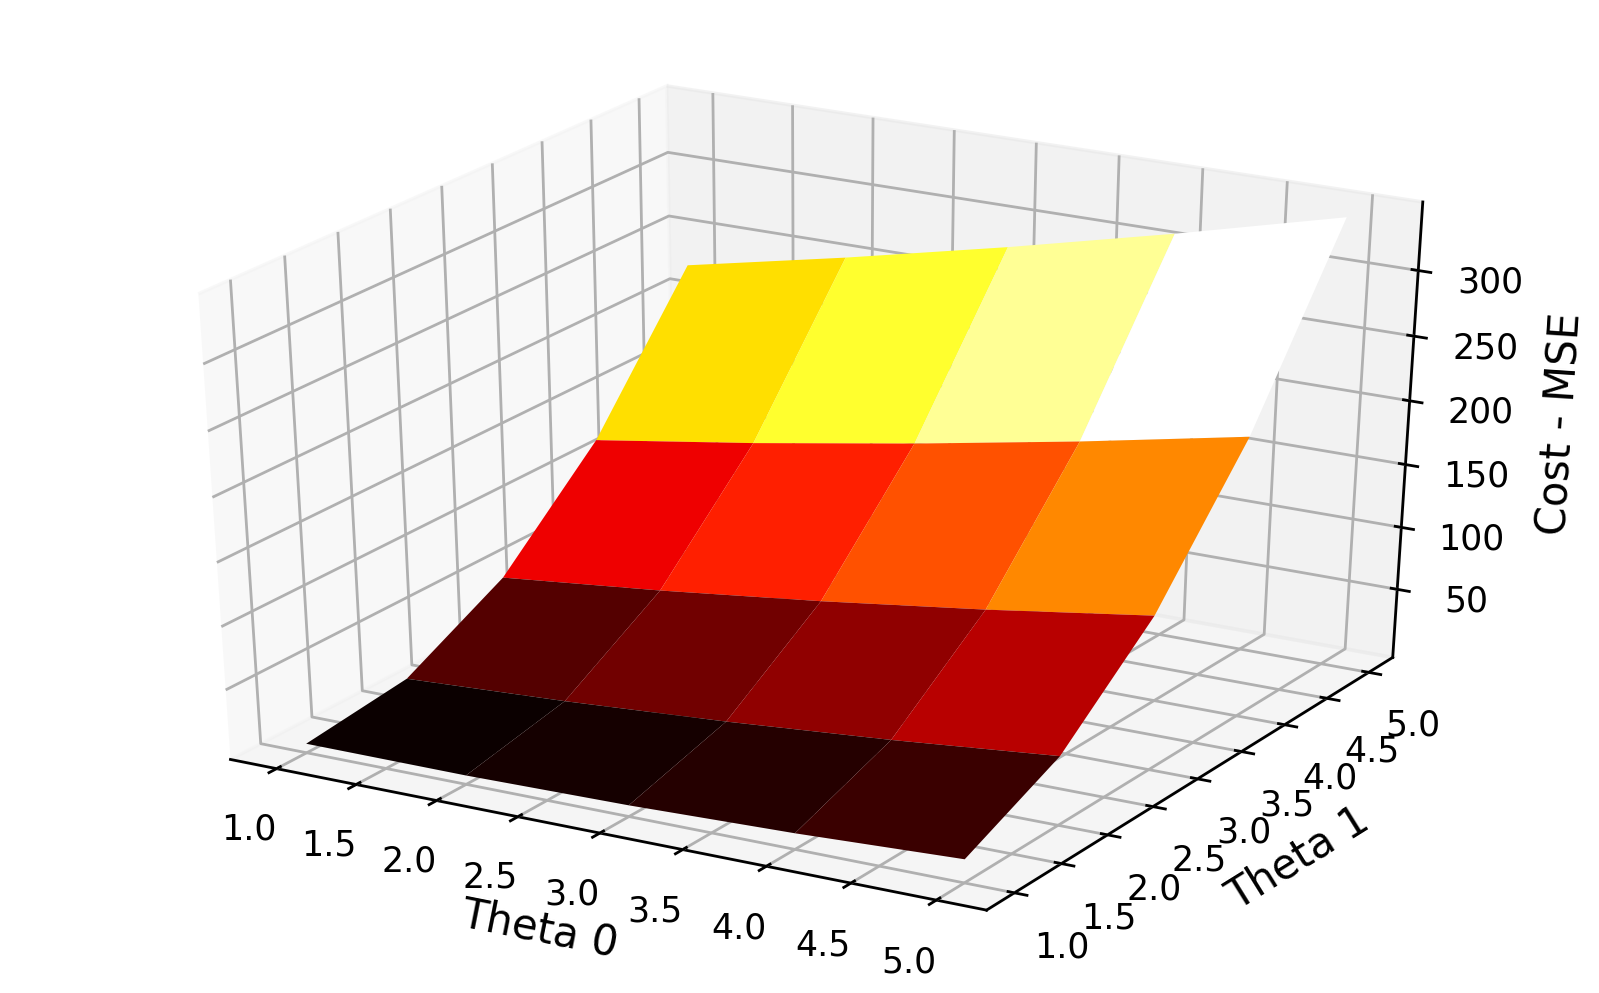

In [14]:
# Plotting MSE
fig = plt.figure(figsize=[8, 5], dpi=250)
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=12)
ax.set_ylabel('Theta 1', fontsize=12)
ax.set_zlabel('Cost - MSE', fontsize=12)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

To understand the 3D shape a little bit better, let's break it down:

1. Where are our little dots?
2. How is the 3D shape drawn?
3. Does this make sense?

For answering those we'll need some more visualization:

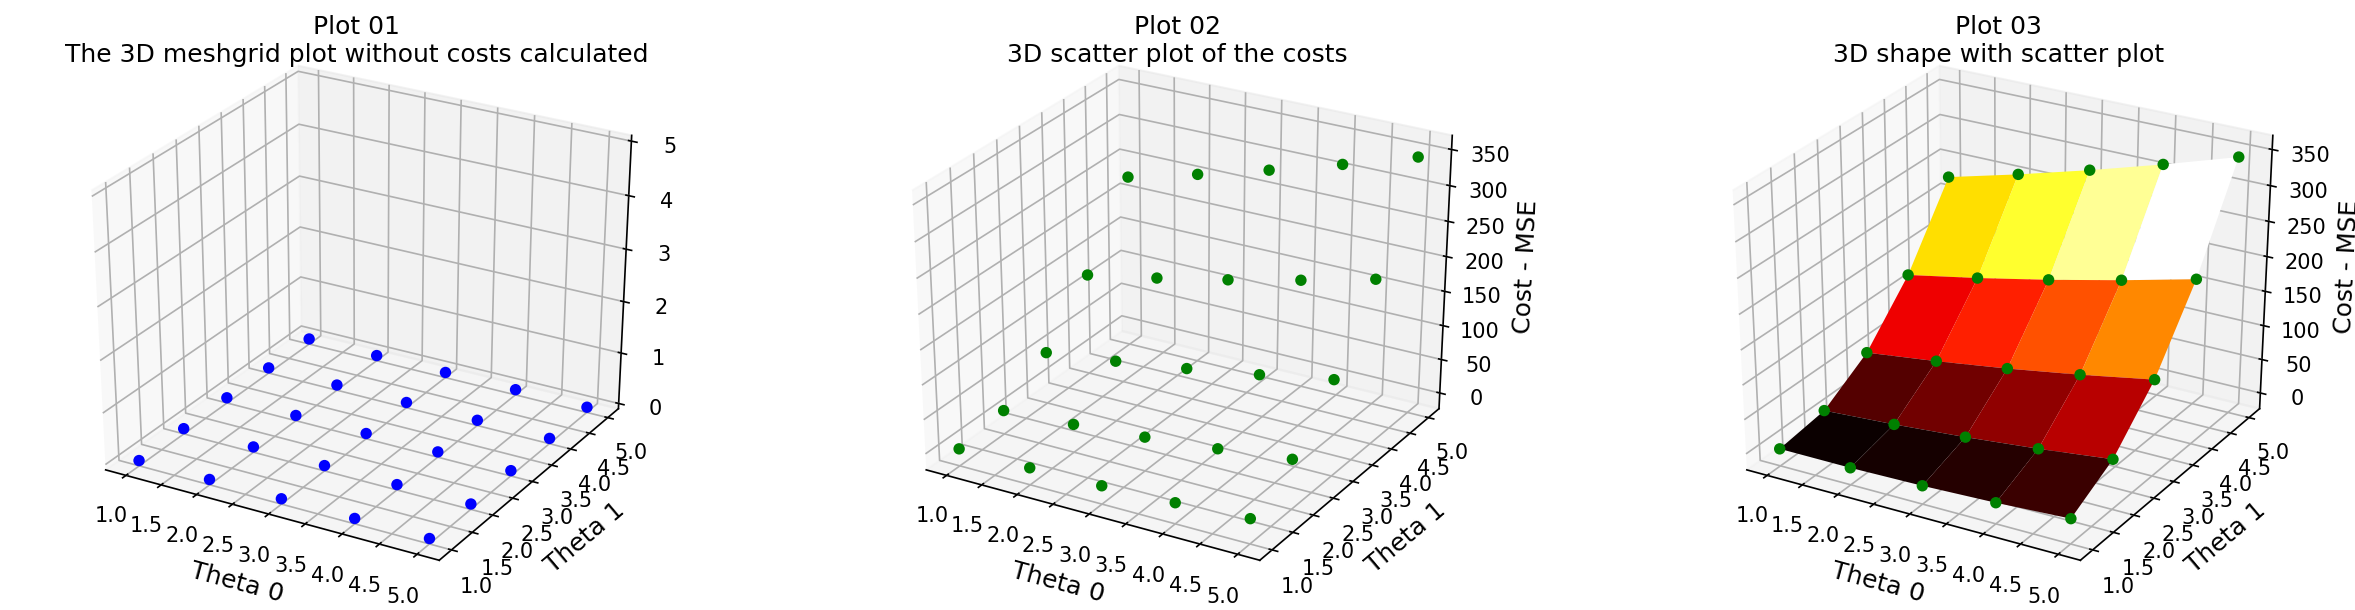

In [15]:
fig = plt.figure(figsize=[20, 5], dpi=150)

# First subplot
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(plot_t0, plot_t1, np.zeros((nr_thetas,nr_thetas)), color="blue", alpha=1)

ax.set_title("Plot 01\nThe 3D meshgrid plot without costs calculated")
ax.set_zlim((0,5))
ax.set_xlabel('Theta 0', fontsize=12)
ax.set_ylabel('Theta 1', fontsize=12)

# Second subplot
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.scatter(plot_t0, plot_t1, plot_cost, color="green", alpha=1)

ax.set_title("Plot 02\n3D scatter plot of the costs")
ax.set_xlabel('Theta 0', fontsize=12)
ax.set_ylabel('Theta 1', fontsize=12)
ax.set_zlabel('Cost - MSE', fontsize=12)

# Third subplot
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
ax.scatter(plot_t0, plot_t1, plot_cost, color="green", alpha=1)

ax.set_title("Plot 03\n3D shape with scatter plot")
ax.set_xlabel('Theta 0', fontsize=12)
ax.set_ylabel('Theta 1', fontsize=12)
ax.set_zlabel('Cost - MSE', fontsize=12)

plt.show()

I think the plot above should make it clear by itself how the surface is drawn and why we need the 25 dots on the $(\theta_0 \times \theta_1)$ plane.

But I'll answer the questions anyway:

1. Plot 01 shows where our meshgrid would be in the Z axis with $Z=0$ and Plot 02 shows where our dots go once we calculate the cost for each of those theta pairs (the meshgrid dots); and
2. Finally, Plot 03 shows how the 3D shape comes to be through the scatter plot. The corners of each square is where our dots are and the 3D shape is drawn by filling (coloring) the square each group of 4 neighbor dots create.
3. Does this make sense? Think about it. I'll talk about it in next section.

## Does this make sense?

Now let's analise this plot... Remember we did a regression in the start of all this? Let's try printing the intercept and coefficient again:

In [16]:
print(
    f"th_0: {regr.intercept_[0]}",
    f"th_1: {regr.coef_[0, 0]}",
    sep='\n'
)

th_0: 0.8475351486029545
th_1: 1.2227264637835913


Basically, those two are "the best thetas there is". Our cost function is smallest near $(\theta_0=1,\theta_1=1)$ and the cost grows as we go to $(\theta_0=5,\theta_1=5)$, which checks out. If we plot negative thetas, their cost will also grow as you get further from $(\theta_0= 0.847, \theta_1= 1.22)$.

### Plotting with negative thetas

Same "workflow" as before

In [17]:
nr_thetas = 101
th_0 = th_1 = np.linspace(start=-2, stop=4, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

print(plot_t0,'\n\n')
print(plot_t1, '\n\n')

[[-2.   -1.94 -1.88 ...  3.88  3.94  4.  ]
 [-2.   -1.94 -1.88 ...  3.88  3.94  4.  ]
 [-2.   -1.94 -1.88 ...  3.88  3.94  4.  ]
 ...
 [-2.   -1.94 -1.88 ...  3.88  3.94  4.  ]
 [-2.   -1.94 -1.88 ...  3.88  3.94  4.  ]
 [-2.   -1.94 -1.88 ...  3.88  3.94  4.  ]] 


[[-2.   -2.   -2.   ... -2.   -2.   -2.  ]
 [-1.94 -1.94 -1.94 ... -1.94 -1.94 -1.94]
 [-1.88 -1.88 -1.88 ... -1.88 -1.88 -1.88]
 ...
 [ 3.88  3.88  3.88 ...  3.88  3.88  3.88]
 [ 3.94  3.94  3.94 ...  3.94  3.94  3.94]
 [ 4.    4.    4.   ...  4.    4.    4.  ]] 




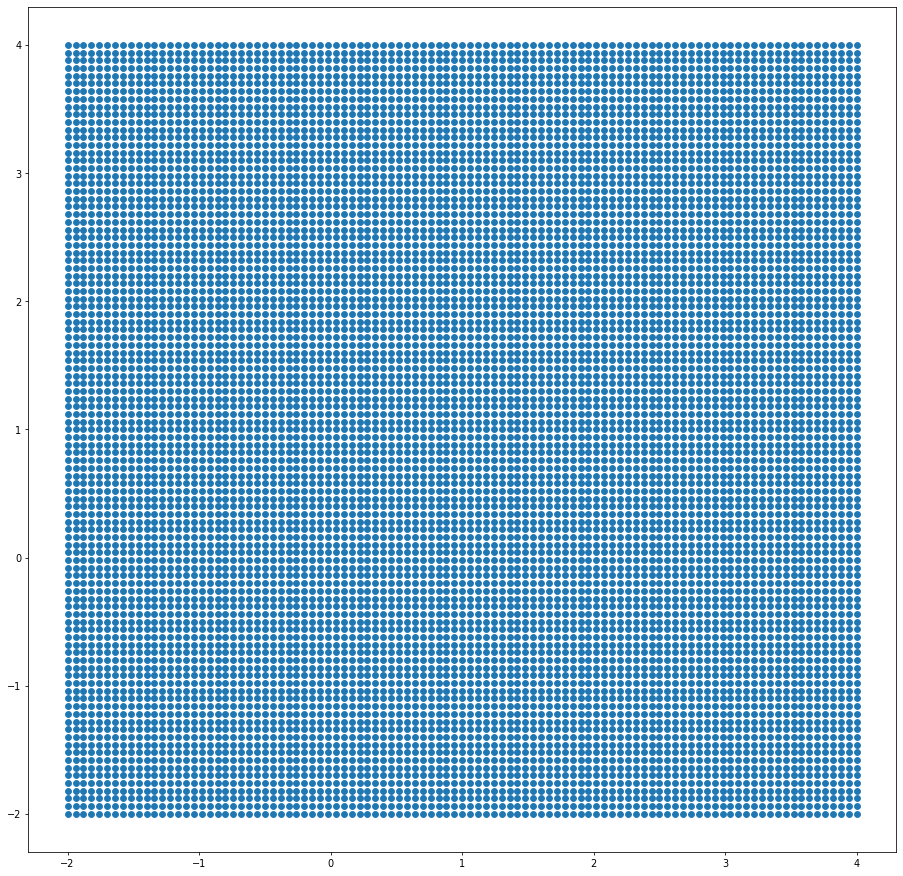

In [18]:
plt.figure(figsize=[16, 16], dpi=70)
plt.scatter(plot_t0, plot_t1)
plt.show()

In [19]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x
        plot_cost[i][j] = mse(y, y_hat)

print(plot_cost)

[[231.61       229.99017143 228.37754286 ... 107.0884     106.17417143
  105.26714286]
 [224.51165714 222.91569143 221.32692571 ... 102.32861714 101.43825143
  100.55508571]
 [217.52542857 215.95332571 214.38842286 ...  97.68094857  96.81444571
   95.95514286]
 ...
 [ 68.8516      69.57033143  70.29626286 ... 173.50888    174.93321143
  176.36474286]
 [ 72.74045714  73.48305143  74.23284571 ... 179.73629714 181.18449143
  182.63988571]
 [ 76.74142857  77.50788571  78.28154286 ... 186.07582857 187.54788571
  189.02714286]]


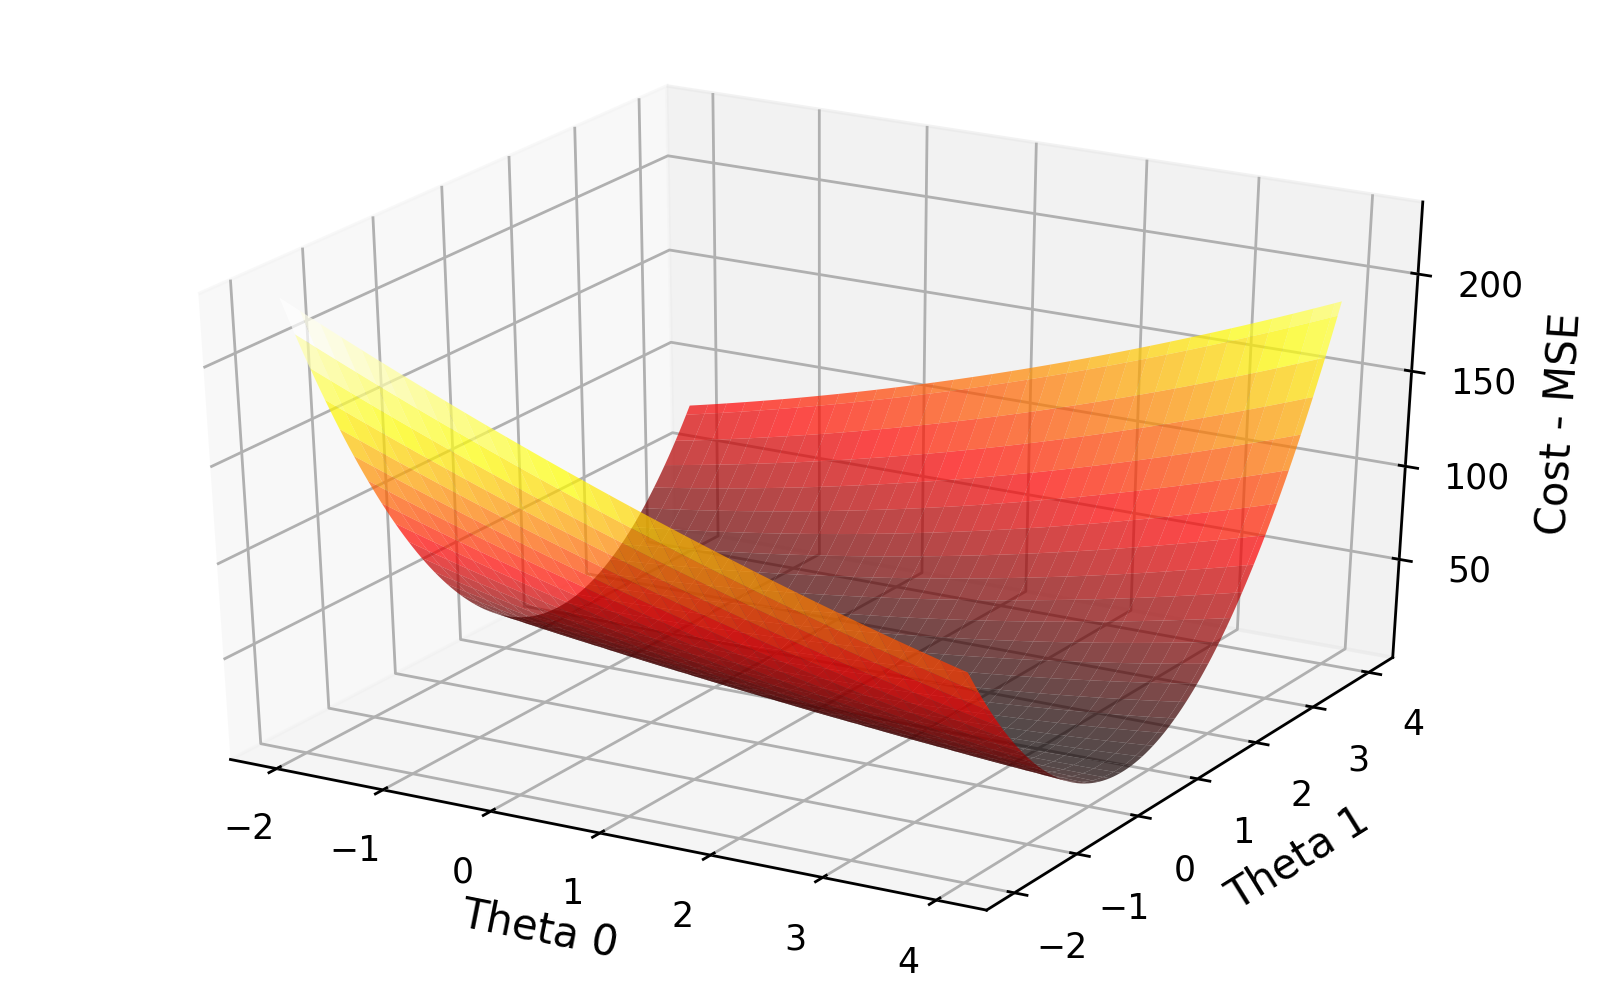

In [20]:
fig = plt.figure(figsize=[8, 5], dpi=250)
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=12)
ax.set_ylabel('Theta 1', fontsize=12)
ax.set_zlabel('Cost - MSE', fontsize=12)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot, alpha=.7)
plt.show()

In [21]:
fig = plt.figure(figsize=[20, 10], dpi=250)

# First subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(plot_t0, plot_t1, np.zeros((nr_thetas,nr_thetas)), color="blue", alpha=1, s=.1)

ax.set_title("Plot 01\nThe 3D meshgrid plot without costs calculated")
ax.set_zlim((0,231))
ax.set_xlabel('Theta 0', fontsize=12)
ax.set_ylabel('Theta 1', fontsize=12)

# Second subplot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(plot_t0, plot_t1, plot_cost, color="green", alpha=.3, s=1)

ax.set_title("Plot 02\n3D scatter plot of the costs")
ax.set_xlabel('Theta 0', fontsize=12)
ax.set_ylabel('Theta 1', fontsize=12)
ax.set_zlabel('Cost - MSE', fontsize=12)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [22]:
fig = plt.figure(figsize=[20, 10], dpi=250)

# Third subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot, alpha=.7)
ax.scatter(plot_t0, plot_t1, plot_cost, color="green", alpha=.3, s=1)

ax.set_title("Plot 03\n3D shape with scatter plot")
ax.set_xlabel('Theta 0', fontsize=12)
ax.set_ylabel('Theta 1', fontsize=12)
ax.set_zlabel('Cost - MSE', fontsize=12)

# Fourth subplot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)

ax.set_title("Plot 04\nJust the surface")
ax.set_xlabel('Theta 0', fontsize=12)
ax.set_ylabel('Theta 1', fontsize=12)
ax.set_zlabel('Cost - MSE', fontsize=12)

plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Now I can sleep

I seriously spent 5h+ straight working on understanding this lesson. It's almost 4AM.

If this was still hard to understand, don't worry. I also get myself questioning, "but is this really right?". I tried my best to not leave any gaps on my reasoning and re-read this many times. If you have trouble, go through the code, make your changes. Test, calculate, change and break the code. Think through what we're trying to achieve here. Maybe even re-do the whole section of the course if necessary. You will get it eventually.